# Foundation+YSE z-band Fits with BayeSN

In this notebook, we demonstrate how BayeSN is used to fit the Foundation and YSE light curves, with specific examples for how to fix parameters as in Appendix B in Hayes+24. We will also re-create Figure 1 from Hayes+24. If you find this resource or the associated paper useful for your work, please cite: .

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
import sncosmo

from py import utils

from bayesn import SEDmodel
model = SEDmodel(load_model='T21_model')

plt.style.use('./stylesheet/zband.mplstyle')

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /data/eeh55/Github/snia-zband/notebooks
Loading built-in model T21_model


In [2]:
# Read data table and apply default cuts, as specified in Hayes+24
full_data = at.Table.read('../tables/full.csv', format='csv')
sample = utils.apply_data_cuts(full_data, print_summary=False)

## Fitting in a Notebook with BayeSN

BayeSN is optimized for fitting batches of SNe Ia on computing clusters. However, there exists functionality for doing BayeSN fits in notebooks for quicker checking of fits to single objects. We will use that functionality here to fit a single YSE light curve.

In [3]:
# Read in the data and do some basic cleaning
snid = '2020evu'
meta, lc = sncosmo.read_snana_ascii(f'../data/YSE/final/{snid}.dat', default_tablename='OBS')
lc = lc['OBS']
lc = lc[np.isin(lc['FLT'], ['g_ZTF', 'r_ZTF'], invert=True)]

z = meta['REDSHIFT_HELIO']
peak_mjd = meta['SEARCH_PEAKMJD']
ebv_mw = meta['MWEBV']

lc['PHASE'] = (lc['MJD'] - peak_mjd) / (1 + z)

t = list(lc['PHASE'].value)
flux = list(lc['FLUXCAL'].value)
flux_err = list(lc['FLUXCALERR'].value)
filters = list(lc['FLT'].value)

In [4]:
# First, we will fit the full griz light curve data
samples, sn_props = model.fit(t, flux, flux_err, filters, z, ebv_mw=meta['MWEBV'])
np.save(f'../local_chains/{snid}_griz_chains.npy', samples, allow_pickle=True)

/home/eeh55/.conda/envs/bayesnEnv/lib/python3.11/site-packages/jax/_src/linear_util.py:192: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      0.45      0.08      0.45      0.32      0.58    534.03      1.00
          Ds[0]     36.89      0.08     36.89     36.77     37.02    530.20      1.00
 eps_tform[0,0]      0.34      0.81      0.34     -0.87      1.74    780.07      1.00
 eps_tform[0,1]      0.03      0.43      0.01     -0.66      0.76   1045.14      1.00
 eps_tform[0,2]      0.14      0.94      0.15     -1.45      1.61   1525.85      1.00
 eps_tform[0,3]     -0.12      0.96     -0.15     -1.74      1.41   1786.81      1.00
 eps_tform[0,4]     -0.33      0.80     -0.34     -1.53      1.10    694.31      1.00
 eps_tform[0,5]      0.00      0.91     -0.02     -1.49      1.42   1491.23      1.00
 eps_tform[0,6]     -0.01      0.87     -0.00     -1.40      1.44    975.52      1.00
 eps_tform[0,7]      0.01      0.74      0.03     -1.23      1.18    937.51      1.00
 eps_tform[0,8]      0.21      0.82      0.18     -1.

In [5]:
# Next, we will fit the z-band only light curve data
# This is done by passing a list of filters to exclude to the "drop_bands" kwarg
samples, sn_props = model.fit(t, flux, flux_err, filters, z=z, ebv_mw=meta['MWEBV'], drop_bands=['g_PS1', 'r_PS1', 'i_PS1'])
np.save(f'../local_chains/{snid}_z_chains.npy', samples, allow_pickle=True)

/home/eeh55/.conda/envs/bayesnEnv/lib/python3.11/site-packages/jax/_src/linear_util.py:192: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      0.19      0.17      0.14      0.00      0.44    535.15      1.01
          Ds[0]     36.98      0.15     36.98     36.74     37.21    418.31      1.00
 eps_tform[0,0]     -0.14      1.03     -0.18     -1.90      1.47   1126.57      1.00
 eps_tform[0,1]     -0.18      0.92     -0.20     -1.63      1.29   1006.16      1.00
 eps_tform[0,2]     -0.09      1.01     -0.05     -1.84      1.44    899.83      1.00
 eps_tform[0,3]     -0.20      1.03     -0.20     -1.74      1.62   1322.31      1.00
 eps_tform[0,4]     -0.04      0.93     -0.03     -1.57      1.50    963.85      1.00
 eps_tform[0,5]     -0.01      0.98      0.03     -1.62      1.47   1077.33      1.00
 eps_tform[0,6]      0.05      0.94      0.09     -1.52      1.53   1102.45      1.00
 eps_tform[0,7]      0.05      0.92      0.07     -1.38      1.60   1128.38      1.00
 eps_tform[0,8]      0.01      1.00      0.03     -1.

## Fitting with Fixed Parameters

In Appendix B of Hayes+24, we consider several analysis variants, such as fitting with a fixed stretch (theta) value. Below you can run a fit with a fixed theta. Feel free to experiment with alternative methods, such as fixing dust (Av) to be zero in a single band fit or allowing the time of maximum flux to be a free parameter.

In [6]:
samples, sn_props = model.fit(t, flux, flux_err, filters, z, ebv_mw=meta['MWEBV'], drop_bands=['g_PS1', 'r_PS1', 'i_PS1'],
                              fix_theta = sample[sample['SNID'] == snid]['GRI_THETA'].value)

/home/eeh55/.conda/envs/bayesnEnv/lib/python3.11/site-packages/jax/_src/linear_util.py:192: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      0.19      0.17      0.13      0.00      0.46    531.66      1.00
          Ds[0]     37.00      0.13     37.01     36.80     37.21    408.81      1.00
 eps_tform[0,0]     -0.19      1.00     -0.22     -1.71      1.52    861.92      1.00
 eps_tform[0,1]     -0.09      0.93     -0.08     -1.66      1.40    937.78      1.00
 eps_tform[0,2]     -0.06      1.04     -0.06     -1.86      1.49   1325.84      1.00
 eps_tform[0,3]     -0.14      1.05     -0.16     -1.64      1.90   1281.67      1.00
 eps_tform[0,4]     -0.08      0.90     -0.06     -1.43      1.52   1046.66      1.00
 eps_tform[0,5]     -0.04      0.96     -0.06     -1.48      1.70   1591.41      1.00
 eps_tform[0,6]      0.02      0.96     -0.00     -1.55      1.59    992.79      1.00
 eps_tform[0,7]      0.04      0.93      0.04     -1.43      1.60    769.61      1.00
 eps_tform[0,8]      0.03      0.99      0.07     -1.

## Plotting the Fits

Now, we will plot the fitted light curves with the data using the chains from the above runs of BayeSN. First, we will show the resulting fit using the chains from a run of BayeSN as specified by the user. Second, we will re-create a figure similar to Figure 1, where the fitted light curves from the fits to the griz data, the optical-only gri data, and the z-band only data in the same figure.

In [7]:
# Re-load in the data
meta, lc = sncosmo.read_snana_ascii(f'../data/YSE/final/{snid}.dat', default_tablename='OBS')
lc = lc['OBS']

z = meta['REDSHIFT_HELIO']
peak_mjd = meta['SEARCH_PEAKMJD']
ebv_mw = meta['MWEBV']

lc['PHASE'] = (lc['MJD'] - peak_mjd) / (1 + z)
lc = lc[np.logical_and(lc['PHASE'] > -10, lc['PHASE'] < 40)]

Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /data/eeh55/Github/snia-zband/notebooks
Loading built-in model T21_model
Getting best fit light curves from chains...


100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Getting best fit light curves from chains...


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Getting best fit light curves from chains...


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Getting best fit light curves from chains...


100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


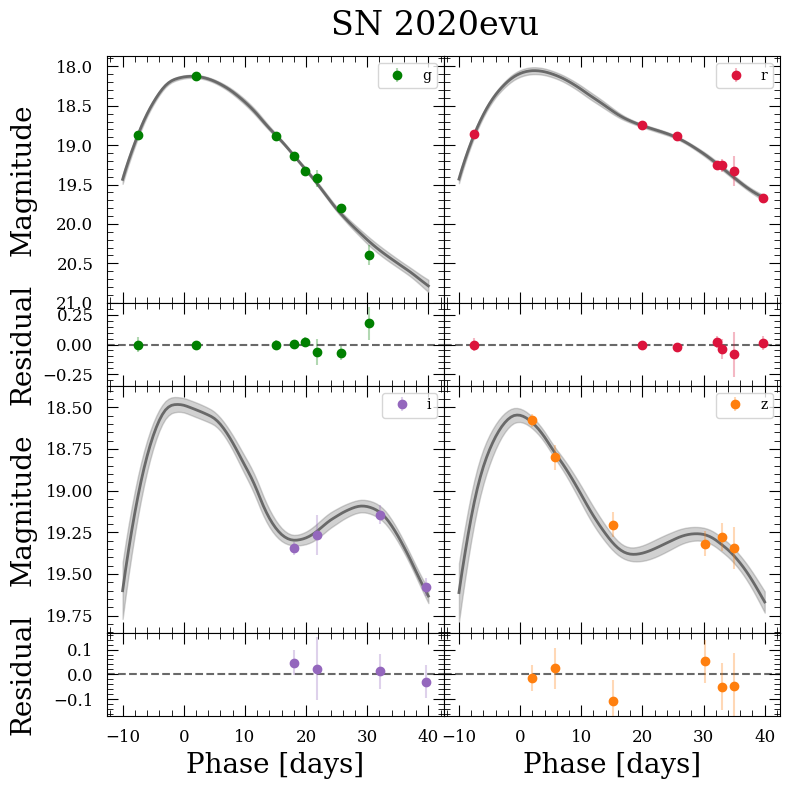

In [8]:
# Plot a fit to the data using chains of the user's specification
# You may show a different fit (the fixed theta fit, for example) by chainging the "chains" path
fig, ax = utils.plot_single_bayesn_fit(snid, meta, lc, chains = f"../local_chains/{snid}_griz_chains.npy")

Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /data/eeh55/Github/snia-zband/notebooks
Loading built-in model T21_model
Getting best fit light curves from chains...


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Getting best fit light curves from chains...


100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Getting best fit light curves from chains...


100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Getting best fit light curves from chains...


100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Getting best fit light curves from chains...


100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


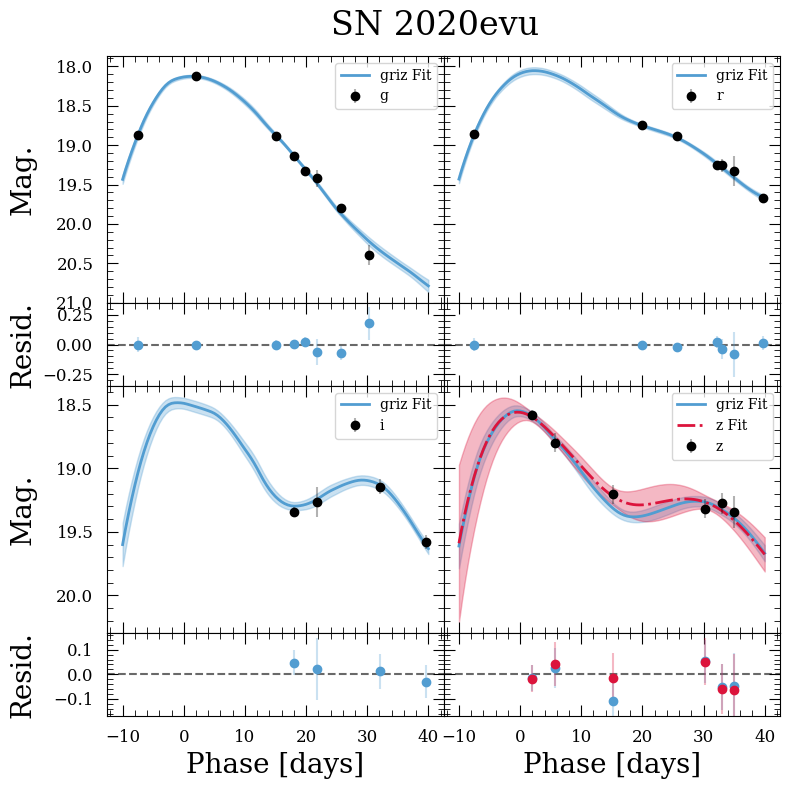

In [9]:
# Re-create a version of Figure 1 from Hayes+24
fig, ax = utils.plot_multi_bayesn_fits(snid, meta, lc, griz_chains = f"../local_chains/{snid}_griz_chains.npy",
                                       gri_chains = None, z_chains = f"../local_chains/{snid}_z_chains.npy")